<a href="https://colab.research.google.com/github/vsilchev/hse-time-series/blob/master/TS_Trend_Season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# STL is available in "statsmodels" since ver. 0.11.1  
# Update "statsmodels" package, if necessary
# Restart runtime after update
!pip install statsmodels -U

In [0]:
import pandas as pd
pd.plotting.register_matplotlib_converters()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller unit root test
from statsmodels.tsa.seasonal import STL       # Season-Trend decomposition using LOESS
from statsmodels.datasets import co2           # 

sns.set(style='ticks', palette='Set2')

## Mauna Loa Weekly Atmospheric CO2 Data

### Тренд и Сезонность

The period (12) is automatically detected from the data’s frequency (‘M’).

In [0]:
co2_ts = co2.load(True).data.resample('M').mean().ffill()

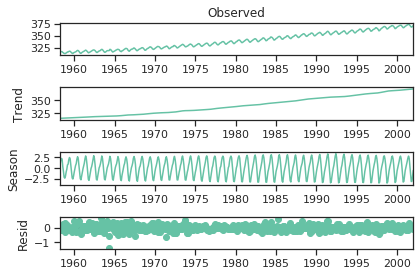

In [3]:
co2_res = STL(co2_ts).fit()
co2_res.plot();

## Обменный курс Евро к Доллару США

источник: [Официальный сайт ФРС США](https://www.federalreserve.gov/datadownload/Choose.aspx?rel=H10)

In [0]:
EurUsd_ts = pd.read_csv("FRB_H10_EURUSD.csv", parse_dates=['date'], na_values='ND').fillna(method='bfill')

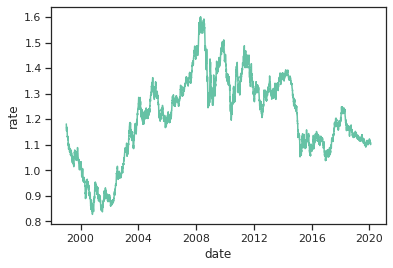

In [5]:
sns.lineplot(x='date', y='rate', data=EurUsd_ts);

### Расширенный Тест Дики — Фуллера

In [7]:
EurUsd_test_results = adfuller(EurUsd_ts['rate'])
print(EurUsd_test_results[1]) # print p-value

0.4992664730692001


In [9]:
diff_test_results = adfuller(np.diff(EurUsd_ts['rate'].values))
print(diff_test_results[1]) #print p-value

0.0


## Обменный курс Рубля к Доллару США

источник: [Официальный сайт ЦБ РФ](https://www.cbr.ru/currency_base/dynamics/)

In [0]:
RurUsd_ts = pd.read_excel("RC_RURUSD.xlsx", parse_dates=['data'])
RurUsd_ts.drop(columns=['nominal', 'cdx'], inplace=True)

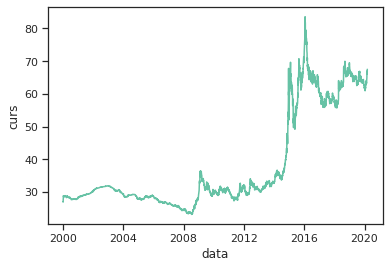

In [11]:
sns.lineplot(x='data', y='curs', data=RurUsd_ts);

### Расширенный Тест Дики — Фуллера

4 версии теста:

1. Без константы и тренда: `'nc'`
1. С константой, но без тренда: `'c'`
1. С константой и линейным трендом: `'ct'`
1. С константой, линейным и квадратичным трендом: `'ctt'`

In [12]:
test_modes = {'c': 'constant only (default)',
              'ct': 'constant and trend',
              'ctt': 'constant, and linear and quadratic trend',
              'nc': 'no constant, no trend'}

for mode, description in test_modes.items():
    test_results = adfuller(RurUsd_ts['curs'], regression=mode)
    print('test mode: {}, p-value: {}'.format(description, test_results[1]))

test mode: constant only (default), p-value: 0.8523643791595674
test mode: constant and trend, p-value: 0.4731948959446595
test mode: constant, and linear and quadratic trend, p-value: 0.12841313555990808
test mode: no constant, no trend, p-value: 0.8600647993728143


### Тренд и Сезонность

In [0]:
month_RurUsd_ts = RurUsd_ts.resample('M', on='data').mean().ffill() # усредняем по месяцу

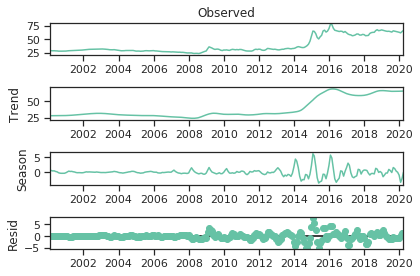

In [15]:
res = STL(month_RurUsd_ts).fit()
res.plot()
plt.show()